# **Klasifikasi Gambar Buah-buahan**

## **Objective:**   
Membangun sebuah model menggunakan CNN yang dapat mengklasifikasikan gambar buah-buahan.

## **Sumber Dataset**
https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification

- **Nama:** Silvia Zahro
- **Email:** mc224d5x0314@student.devacademy.id
- **ID Dicoding:** MC224D5X0314

## **Import Library**

In [1]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import tensorflow as tf
# Ensure TensorFlow version compatibility by installing or upgrading if needed
!pip install tensorflow>=2.3.0 # Upgrade to TensorFlow 2.3.0 or higher to use random_blur

# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import EfficientNetB3

# Model Inference
from keras.layers import TFSMLayer
from keras import Sequential
from tensorflow.keras.preprocessing import image

In [2]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## **Data Preparation**


### Data Loading

Mengunggah file "**kaggle.json**" yang berisi token dari akun kaggle. File "**kaggle.json**" didapatkan dari akun kaggle yang bisa diperoleh dari langkah-langkah berikut:
- Masuk ke akun Kaggle dan pergi ke bagian "**Settings**" yang terletak di sisi kanan situs web.
- Setelah itu, klik tombol "**Create New Token**" dan file bernama "kaggle.json" diunduh secara otomatis.



In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"silviazahro","key":"a1372aa152e8463fefebebaa2760ae55"}'}

In [4]:
# Download kaggle dataset and unzip the file
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d utkarshsaxenadn/fruits-classification
!unzip fruits-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Classification/train/Grape/Grape (1950).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1952).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1953).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1955).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1956).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1957).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1958).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1959).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (196).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1960).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1961).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1962).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1963).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1964).jpeg  
  inflating:

## **Data Preprocessing**

### Data Inspection

In [5]:
folder = "Fruits Classification"
sizes = {}
total_images = 0

for root, dirs, files in os.walk(folder):
    for filename in files:
        if filename.endswith((".jpg", ".png", ".jpeg")):
            path = os.path.join(root, filename)
            try:
                img = Image.open(path)
                sizes[filename] = img.size
                total_images += 1
            except:
                print(f"Gagal membuka gambar: {path}")

# Tampilkan ukuran gambar per file
for fname, size in sizes.items():
    print(f"{fname}: {size}")

# Tampilkan total jumlah gambar
print(f"\nTotal gambar di dalam folder '{folder}': {total_images}")

Grape (1242).jpeg: (183, 275)
Grape (1038).jpeg: (259, 194)
Grape (954).jpeg: (178, 283)
Grape (1542).jpeg: (190, 265)
Grape (165).jpeg: (232, 218)
Grape (559).jpeg: (277, 182)
Grape (1474).jpeg: (194, 259)
Grape (1922).jpeg: (276, 183)
Grape (953).jpeg: (225, 225)
Grape (1444).jpeg: (100, 100)
Grape (1941).jpeg: (260, 194)
Grape (1307).jpeg: (250, 202)
Grape (396).jpeg: (262, 192)
Grape (1594).jpeg: (259, 194)
Grape (125).jpeg: (225, 225)
Grape (1954).jpeg: (275, 183)
Grape (1996).jpeg: (135, 115)
Grape (1488).jpeg: (259, 194)
Grape (1275).jpeg: (183, 275)
Grape (936).jpeg: (225, 225)
Grape (989).jpeg: (230, 219)
Grape (835).jpeg: (328, 154)
Grape (309).jpeg: (183, 275)
Grape (84).jpeg: (275, 183)
Grape (270).jpeg: (274, 184)
Grape (338).jpeg: (225, 225)
Grape (982).jpeg: (183, 275)
Grape (728).jpeg: (168, 300)
Grape (890).jpeg: (290, 174)
Grape (483).jpeg: (100, 100)
Grape (1773).jpeg: (225, 225)
Grape (1409).jpeg: (225, 225)
Grape (1811).jpeg: (300, 168)
Grape (757).jpeg: (183, 275)

### Data Preparation

In [6]:
import os
import shutil

# Direktori awal untuk train dan test
train_dir = "Fruits Classification/train"
test_dir = "Fruits Classification/test"

# Direktori baru untuk dataset gabungan
combined_dir = "Fruits Classification/dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

### Dataset Checking

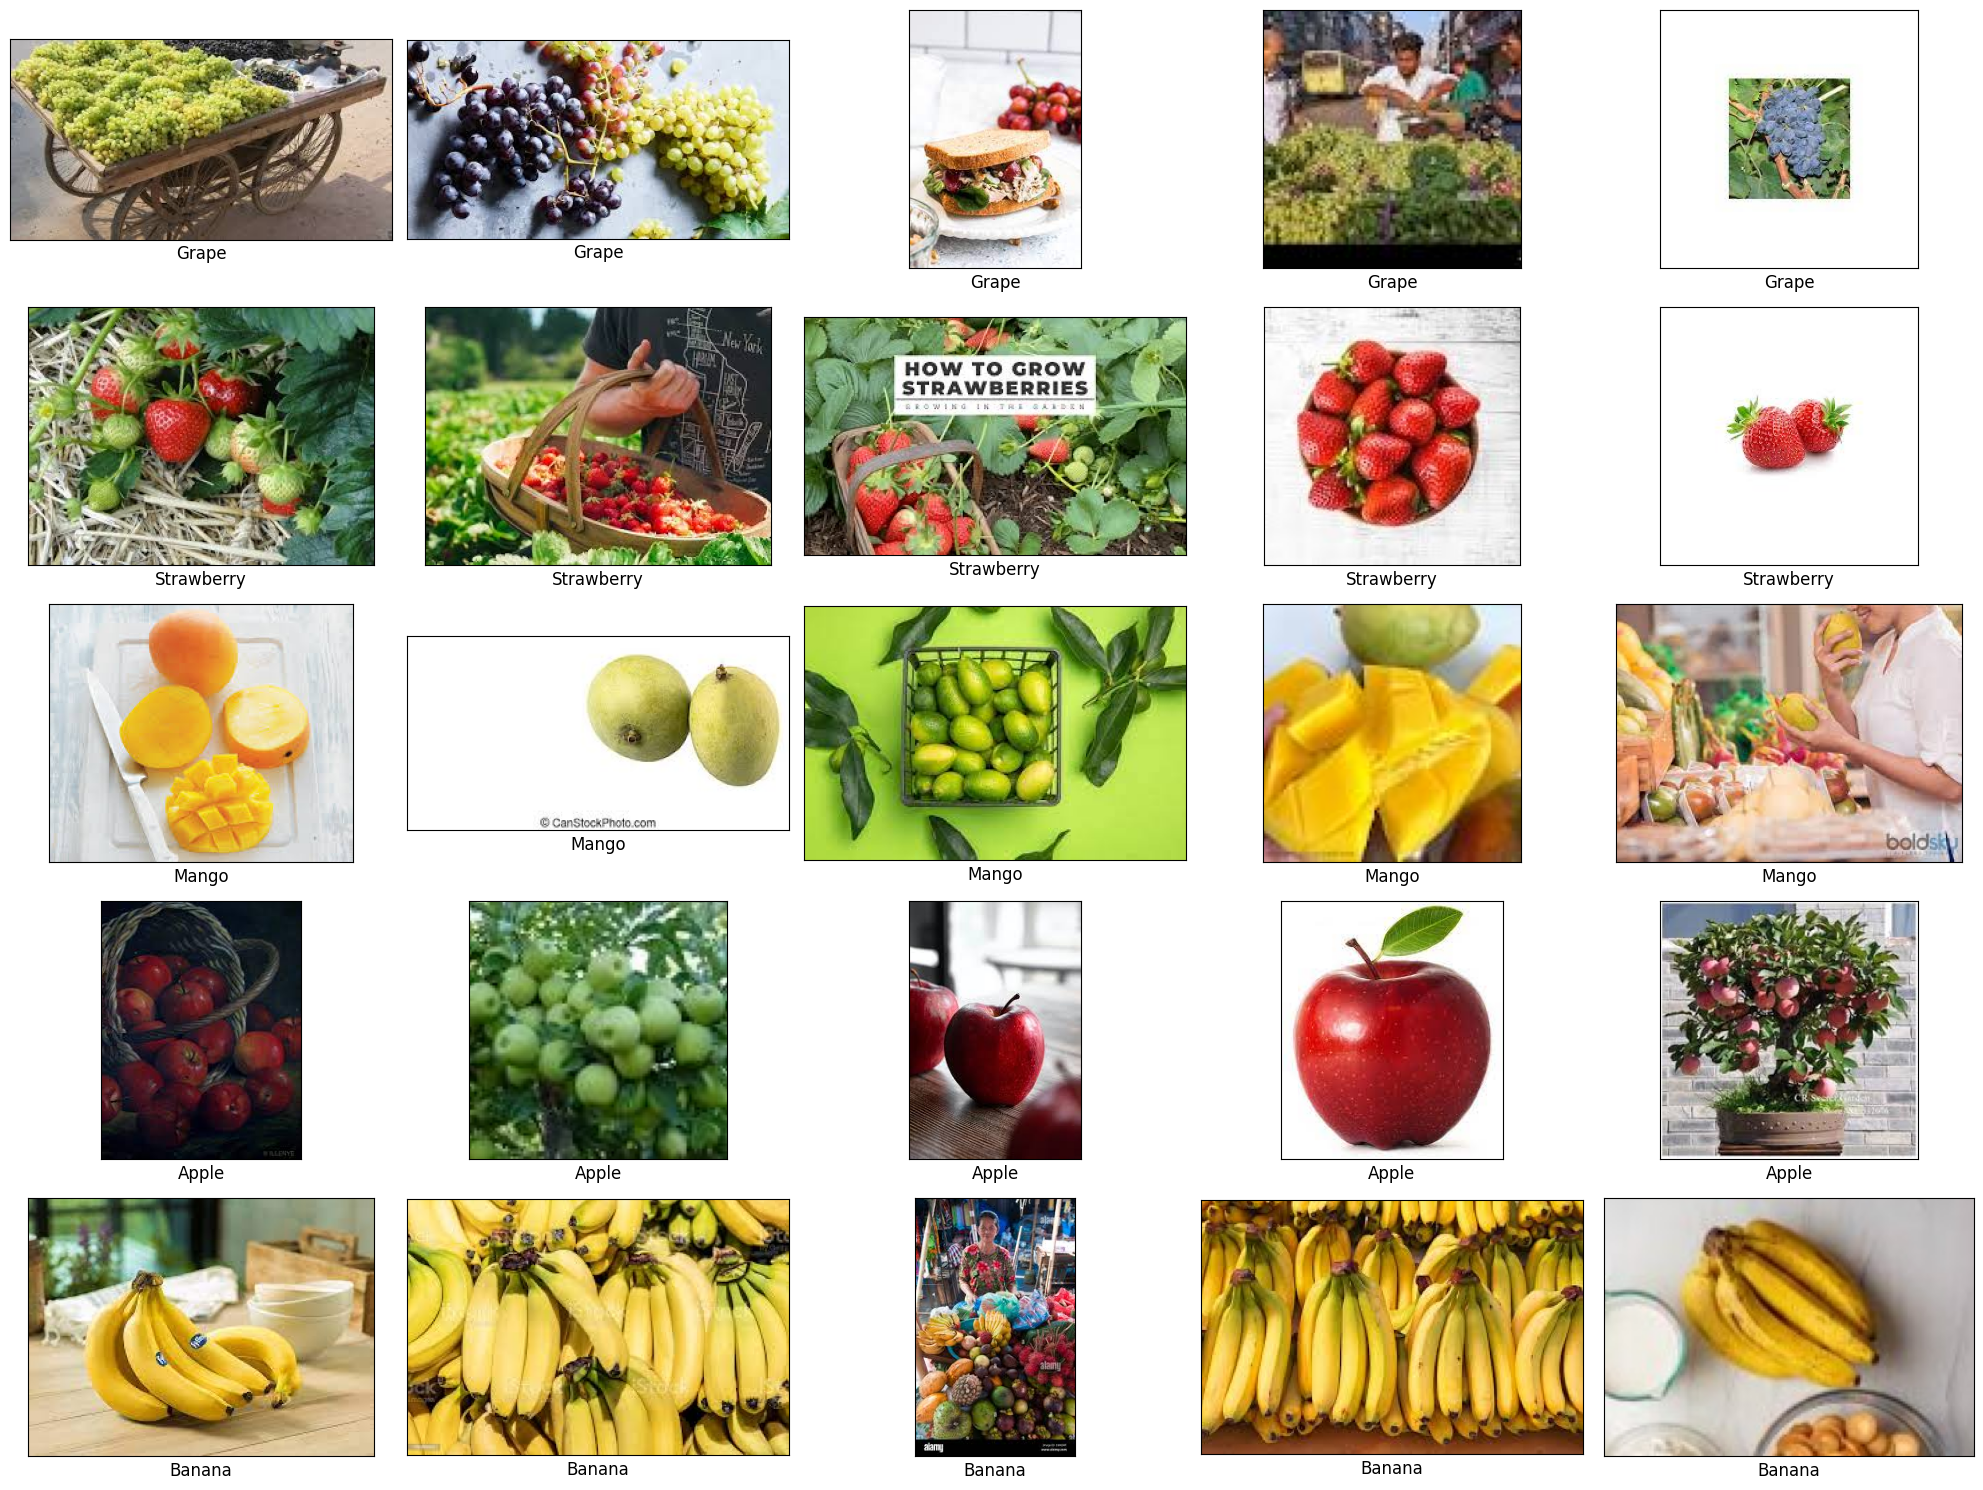

In [7]:
# Membuat kamus yang menyimpan daftar nama file gambar untuk setiap kelas dalam data
garbages_image = {}

# Tentukan path sumber train
path = "Fruits Classification"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    garbages_image[i] = os.listdir(os.path.join(path_sub, i))

# Path dataset untuk menampilkan gambar
dataset_path = os.path.join(path, "dataset")

# Sesuaikan ukuran canvas: tinggi canvas disesuaikan dengan jumlah kelas (misal 3 inci per kelas)
n_classes = len(garbages_image.keys())
fig, axs = plt.subplots(n_classes, 5, figsize=(20, n_classes * 3))

# Jika hanya ada satu kelas, pastikan axs berbentuk 2D agar loop di bawah dapat berjalan
if n_classes == 1:
    axs = np.expand_dims(axs, axis=0)

# Menampilkan 5 gambar acak untuk setiap kelas
for i, class_name in enumerate(os.listdir(dataset_path)):
    images = np.random.choice(garbages_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(dataset_path, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set_xlabel(class_name, fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

fig.tight_layout()
plt.show()

### Data Distribution

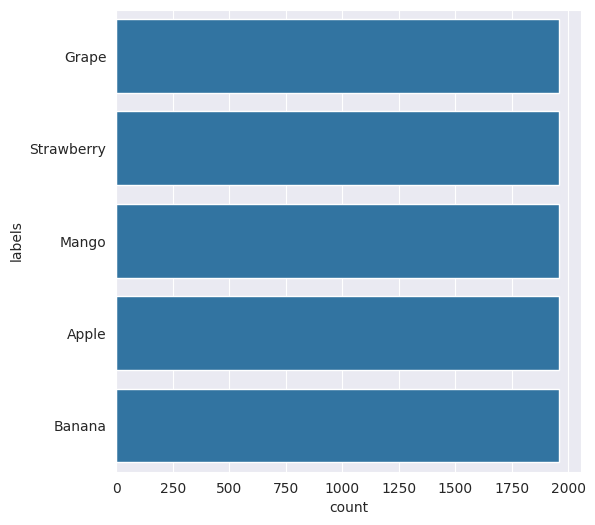

In [8]:
# Define source path
lung_path = "Fruits Classification/dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

## **Data Augmentation**

Proses augmentasi gambar adalah teknik yang digunakan untuk membuat variasi baru dari setiap gambar dalam dataset, sehingga model memiliki lebih banyak variasi untuk dipelajari. Ini membantu mencegah overfitting, di mana model terlalu terbiasa dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik ke data baru.

In [9]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,30)
    return rotate(img, sudut)

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,30)
    return rotate(img, -sudut)

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

# Membuat variabel transformasi yang akan menyimpan semua proses pra-pemrosesan yang telah dilakukan sebelumnya
transformations = { 'rotate anticlockwise': anticlockwise_rotation,
                    'rotate clockwise': clockwise_rotation,
                    'shear image': sheared
                  }

images_path="Fruits Classification/dataset" # Path untuk gambar asli
augmented_path="Fruits Classification/dataset-augmented" # Path untuk gambar yang sudah diaugmentasi
images=[] # Penyimpanan gambar yang telah melalui pra-pemrosesan

# Baca nama gambar dari folder dan tambahkan path ke dalam array "images"
for class_folder in os.listdir(images_path):
    class_path = os.path.join(images_path, class_folder)
    if os.path.isdir(class_path):
        for im in os.listdir(class_path):
            images.append(os.path.join(class_path, im))

images_to_generate = 10000
i = 1

while i <= images_to_generate:
    image = random.choice(images)
    try:
        original_image = io.imread(image)
        transformed_image = original_image.copy()

        # Ambil label dari nama folder
        label = os.path.basename(os.path.dirname(image))
        save_dir = os.path.join(augmented_path, label)
        os.makedirs(save_dir, exist_ok=True)

        # Terapkan transformasi acak
        n = 0
        transformation_count = random.randint(1, len(transformations))  # jumlah transformasi yang akan diterapkan

        while n < transformation_count:
            key = random.choice(list(transformations))  # ambil nama transformasi acak
            transformed_image = transformations[key](transformed_image)
            n += 1

        # Simpan hasil gambar
        new_image_path = os.path.join(save_dir, f"augmented_image_{i}.jpg")
        transformed_image = img_as_ubyte(transformed_image)
        cv2.imwrite(new_image_path, transformed_image)
        i += 1

    except Exception as e:
        print(f'Could not process image {image} : {e}, skipping...')

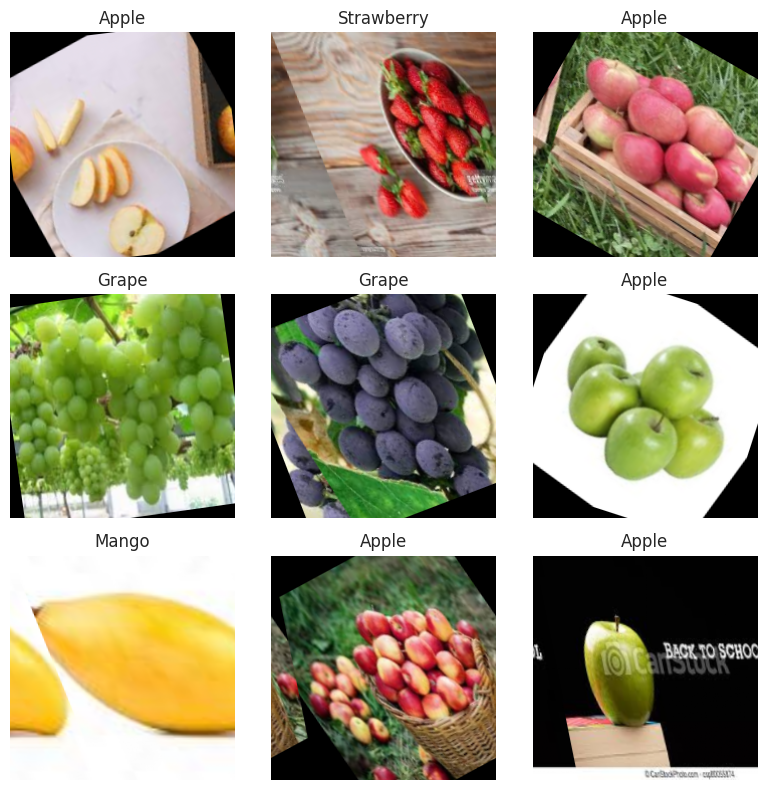

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

for i in range(3):
    for j in range(3):
        img_path = random.choice(images)
        img = io.imread(img_path)
        label = os.path.basename(os.path.dirname(img_path))

        transformed = img.copy()
        for _ in range(random.randint(1, 2)):
            transformed = random.choice(list(transformations.values()))(transformed)

        axs[i, j].imshow(transformed)
        axs[i, j].axis("off")
        axs[i, j].set_title(label)

plt.tight_layout()
plt.show()

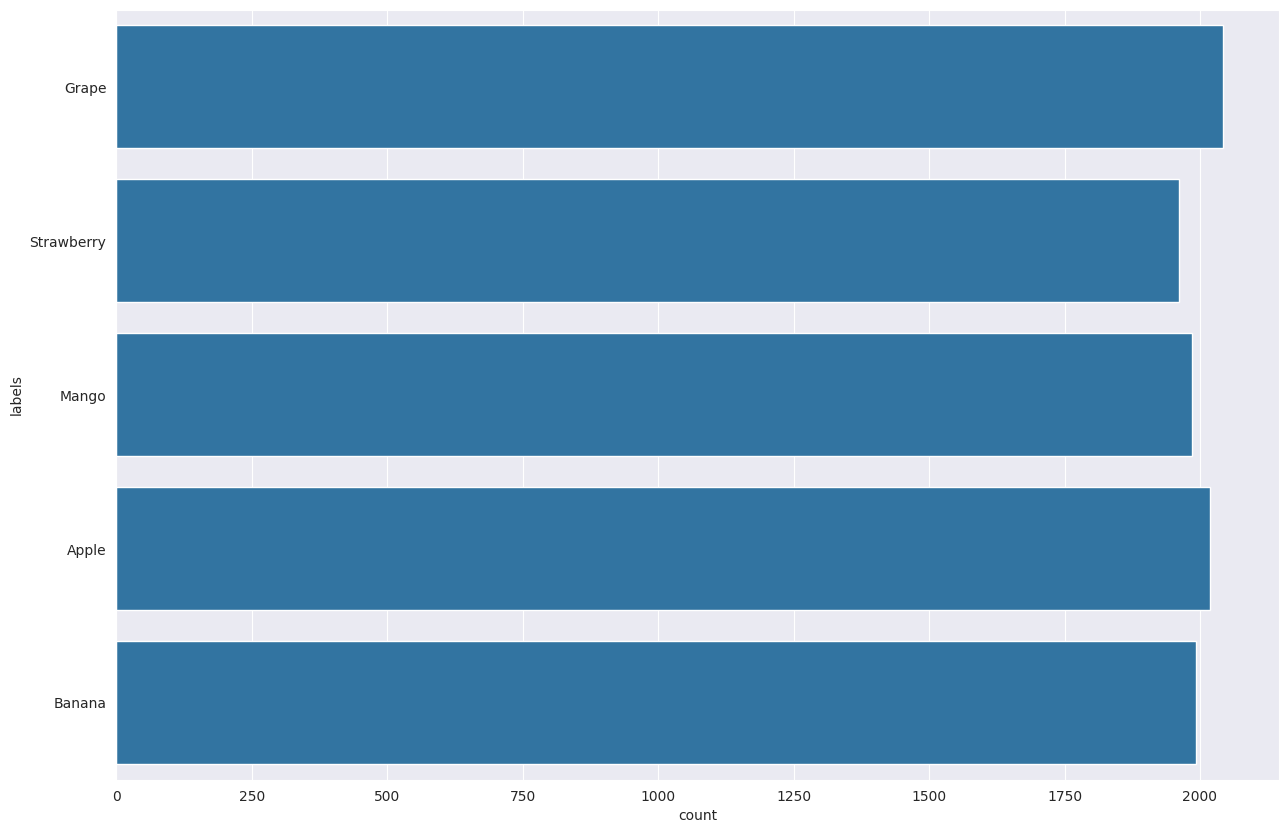

In [11]:
# Definisikan path sumber
sports_path = "Fruits Classification/dataset-augmented"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(sports_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

## **Data Splitting : Training & Testing**

In [12]:
# Panggil variabel mypath yang menampung folder dataset gambarPath ke dataset awal
mypath = 'Fruits Classification/dataset'

# Kumpulkan path file dan label
file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))  # Label = nama folder (kelas)
        file_name.append(name)

# Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapi
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
Apple         1960
Banana        1960
Grape         1960
Mango         1960
Strawberry    1960
dtype: int64

Membagi dataset menjadi data training (70%), validasi (15%), dan testing (15%) secara proporsional berdasarkan label.

In [13]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X = df['path']
y = df['labels']

# Split train dan temp (valid + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=300)

# Split valid dan test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=300)

Membuat DataFrame untuk masing-masing data (train, validasi, test), lalu menyalin file gambar ke folder baru sesuai set dan labelnya.

In [14]:
# Satukan ke dalam masing-masing dataframe
df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_valid = pd.DataFrame({'path': X_valid, 'labels': y_valid, 'set': 'valid'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Gabungkan DataFrame df_train, df_valind, dan df_test
df_all = pd.concat([df_train, df_valid, df_test], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print(df_all.sample(5))

# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "Fruits Classification/dataset"
# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Fruits Classification/submission/"

for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)


set    labels    
test   Apple          294
       Banana         294
       Grape          294
       Mango          294
       Strawberry     294
train  Apple         1372
       Banana        1372
       Grape         1372
       Mango         1372
       Strawberry    1372
valid  Apple          294
       Banana         294
       Grape          294
       Mango          294
       Strawberry     294
dtype: int64 


                                                   path  labels    set
643   Fruits Classification/dataset/Grape/Grape (162...   Grape  train
1660  Fruits Classification/dataset/Mango/Mango (63)...   Mango  train
4757  Fruits Classification/dataset/Mango/Mango (562...   Mango  train
3516  Fruits Classification/dataset/Apple/Apple (116...   Apple  train
8223  Fruits Classification/dataset/Banana/Banana (2...  Banana  valid


0it [00:00, ?it/s]

## **Image Data Generator**

Mengecek jumlah file gambar dalam setiap kelas di folder train, validasi, dan test.

In [15]:
# Path direktori dataset
TRAIN_DIR = "Fruits Classification/submission/train/"
VALID_DIR = "Fruits Classification/submission/test/"
TEST_DIR = "Fruits Classification/submission/valid/"

# Fungsi untuk menampilkan jumlah gambar per kelas
def print_class_distribution(directory, set_name):
    print(f"\nJumlah gambar di {set_name.upper()} set:")
    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            total = len(os.listdir(class_path))
            print(f"  {class_name:<30}: {total} gambar")

# Tampilkan distribusi semua kelas untuk train, valid, test
print_class_distribution(TRAIN_DIR, "train")
print_class_distribution(VALID_DIR, "valid")
print_class_distribution(TEST_DIR, "test")


Jumlah gambar di TRAIN set:
  Apple                         : 1372 gambar
  Banana                        : 1372 gambar
  Grape                         : 1372 gambar
  Mango                         : 1372 gambar
  Strawberry                    : 1372 gambar

Jumlah gambar di VALID set:
  Apple                         : 294 gambar
  Banana                        : 294 gambar
  Grape                         : 294 gambar
  Mango                         : 294 gambar
  Strawberry                    : 294 gambar

Jumlah gambar di TEST set:
  Apple                         : 294 gambar
  Banana                        : 294 gambar
  Grape                         : 294 gambar
  Mango                         : 294 gambar
  Strawberry                    : 294 gambar


Membuat generator data untuk train, validasi, dan test dengan menerapkan augmentasi pada train dan validasi, serta melakukan normalisasi gambar di ketiga set tersebut.

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # dikurangi
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 6860 images belonging to 5 classes.
Found 1470 images belonging to 5 classes.
Found 1470 images belonging to 5 classes.


## **Model Building**

Membangun model klasifikasi dengan dasar EfficientNetB3 yang dilengkapi sejumlah layer CNN dan Dense, kemudian dikompilasi menggunakan optimizer Adam serta fungsi loss categorical crossentropy.

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 256)      │     3,539,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         3,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,947,692 (57.02 MB)

 Trainable params: 14,860,389 (56.69 MB)

 Non-trainable params: 87,303 (341.03 KB)

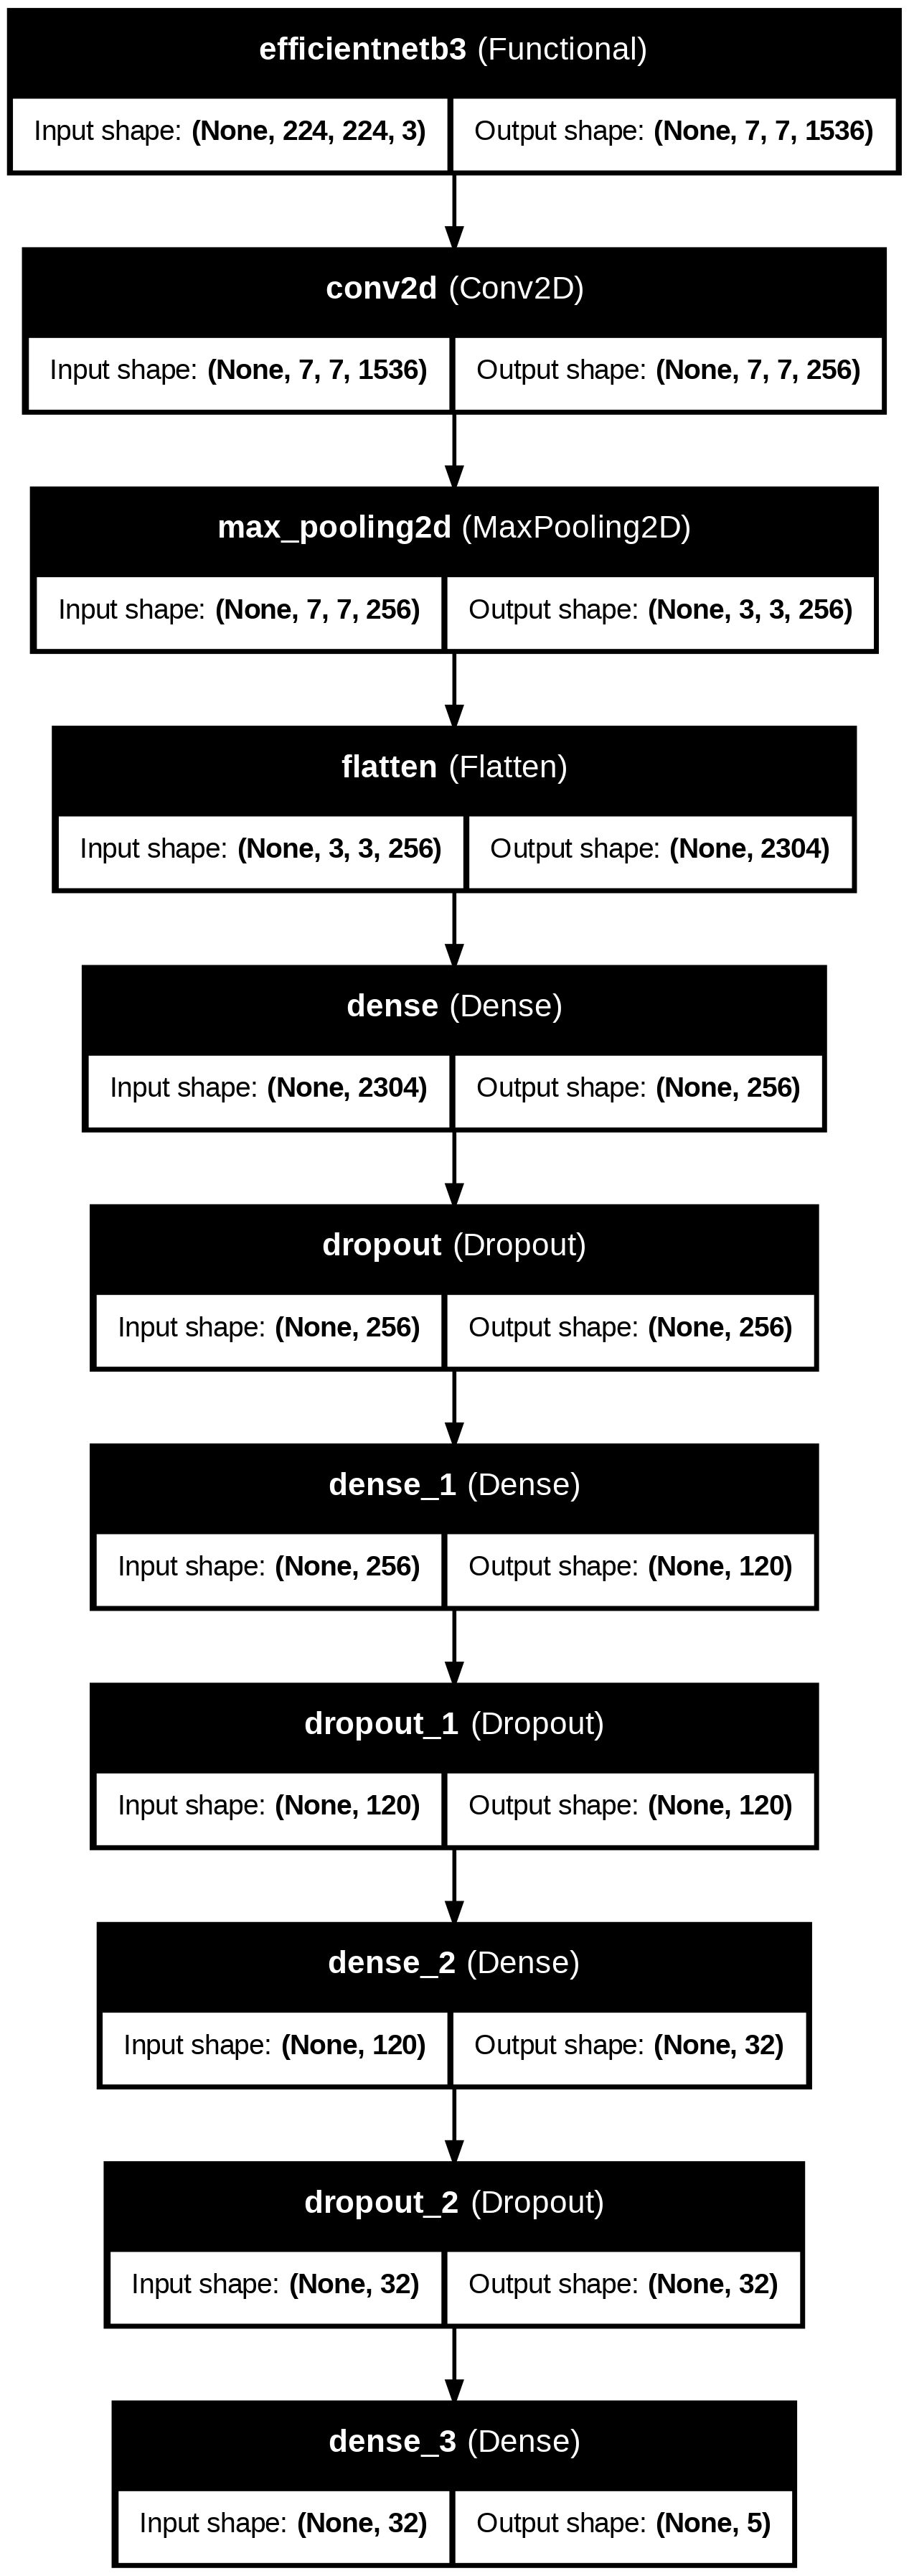

In [17]:
# Inisialisasi model dasar menggunakan EfficientNetB3 dengan bobot pretrained dari ImageNet
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = True  # Izinkan fine-tuning seluruh layer

# Bangun model dengan menambahkan layer-layer di atas base_model
model = Sequential([
    base_model,
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(120, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

# Kompilasi model dengan Adam optimizer dan loss function categorical crossentropy
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan arsitektur model
model.summary()

# Visualisasi arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

## **Model Training**

Melatih model dengan menyesuaikan bobot kelas untuk mengatasi ketidakseimbangan data, sekaligus menerapkan callback guna menghentikan pelatihan lebih awal, menyesuaikan learning rate saat performa validasi menurun, dan menyimpan versi model terbaik selama pelatihan berlangsung. Dengan penggunaan callback ini, model telah memenuhi rekomendasi poin pertama, yaitu: **Mengimplementasikan Callback**.

In [18]:
# Hitung bobot kelas untuk mengatasi ketidakseimbangan label
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Inisialisasi daftar callback untuk pelatihan
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    ModelCheckpoint(filepath='submission/best_model.keras', save_best_only=True)
]

# --- FASE TRAINING 1: Melatih layer Dense terlebih dahulu ---
history1 = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 314s 880ms/step - accuracy: 0.2248 - loss: 2.0016 - val_accuracy: 0.2442 - val_loss: 1.6051 - learning_rate: 1.0000e-05
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 118s 549ms/step - accuracy: 0.3192 - loss: 1.5657 - val_accuracy: 0.4707 - val_loss: 1.4032 - learning_rate: 1.0000e-05
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 120s 556ms/step - accuracy: 0.4139 - loss: 1.3760 - val_accuracy: 0.6415 - val_loss: 1.0446 - learning_rate: 1.0000e-05
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 120s 557ms/step - accuracy: 0.5263 - loss: 1.2001 - val_accuracy: 0.7605 - val_loss: 0.7837 - learning_rate: 1.0000e-05
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 118s 546ms/step - accuracy: 0.6096 - loss: 0.9995 - val_accuracy: 0.7871 - val_loss: 0.6782 - learning_rate: 1.0000e-05
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 120s 556ms/step - accuracy: 0.6491 - loss: 0.9283 - val_accuracy: 0.7898 - val_loss: 0.6345 - learning_rate: 1.0000e-05
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 

## **Evaluasi dan Visualisasi**

Grafik berikut memperlihatkan bahwa akurasi model mengalami peningkatan konsisten pada data pelatihan dan validasi, disertai penurunan nilai loss yang berkelanjutan tanpa indikasi overfitting, menandakan proses pembelajaran model berjalan optimal.

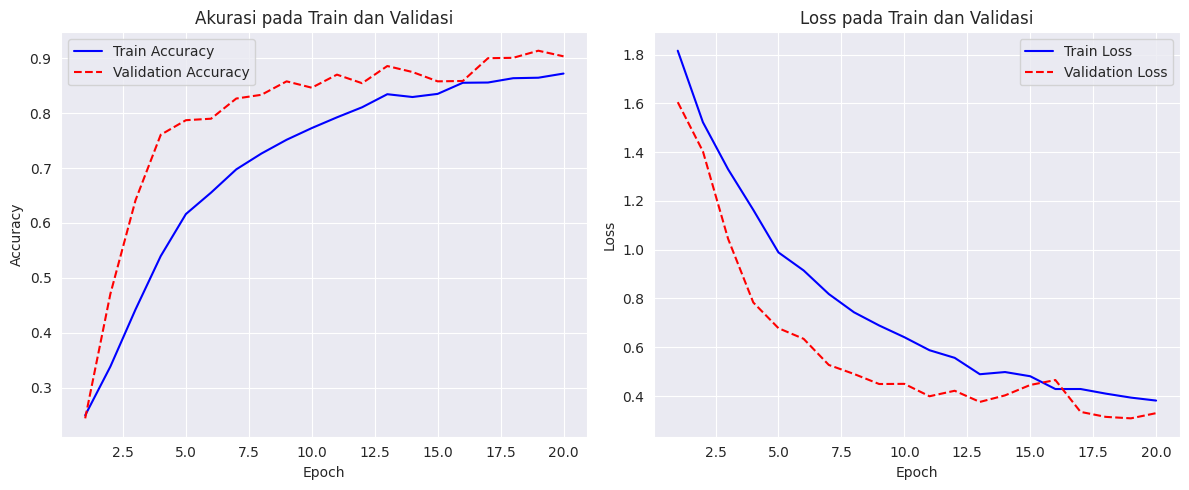

In [19]:
# Ambil riwayat akurasi dan loss dari hasil pelatihan
acc      = history1.history['accuracy']
val_acc  = history1.history['val_accuracy']
loss     = history1.history['loss']
val_loss = history1.history['val_loss']
epochs   = list(range(1, len(acc) + 1))

# Visualisasi performa model selama pelatihan
plt.figure(figsize=(12, 5))

# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color='blue', linestyle='-', label='Train Accuracy')
plt.plot(epochs, val_acc, color='red', linestyle='--', label='Validation Accuracy')
plt.title('Akurasi pada Train dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color='blue', linestyle='-', label='Train Loss')
plt.plot(epochs, val_loss, color='red', linestyle='--', label='Validation Loss')
plt.title('Loss pada Train dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Melakukan evaluasi terhadap kinerja model menggunakan data pelatihan dan pengujian, dengan hasil akurasi yang sangat tinggi: 94.87% pada data training dan 88.64% pada data testing, menunjukkan bahwa model memiliki performa yang sangat baik serta kemampuan generalisasi yang kuat.

In [20]:
train_loss, train_acc = model.evaluate(train_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\nTrain accuracy: {train_acc*100:.2f}%")
print(f"\nTest accuracy: {test_acc*100:.2f}%")

215/215 ━━━━━━━━━━━━━━━━━━━━ 89s 414ms/step - accuracy: 0.9521 - loss: 0.1653
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8579 - loss: 0.4648

Train accuracy: 94.87%

Test accuracy: 88.64%


Model mampu mengklasifikasikan gambar dengan tingkat ketepatan yang sangat tinggi, tercermin dari akurasi sebesar 88.64% serta skor precision, recall, dan f1-score yang unggul di setiap kelas.

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step
              precision    recall  f1-score   support

       Apple       0.81      0.82      0.82       294
      Banana       0.92      0.91      0.92       294
       Grape       0.93      0.84      0.88       294
       Mango       0.83      0.89      0.86       294
  Strawberry       0.94      0.96      0.95       294

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



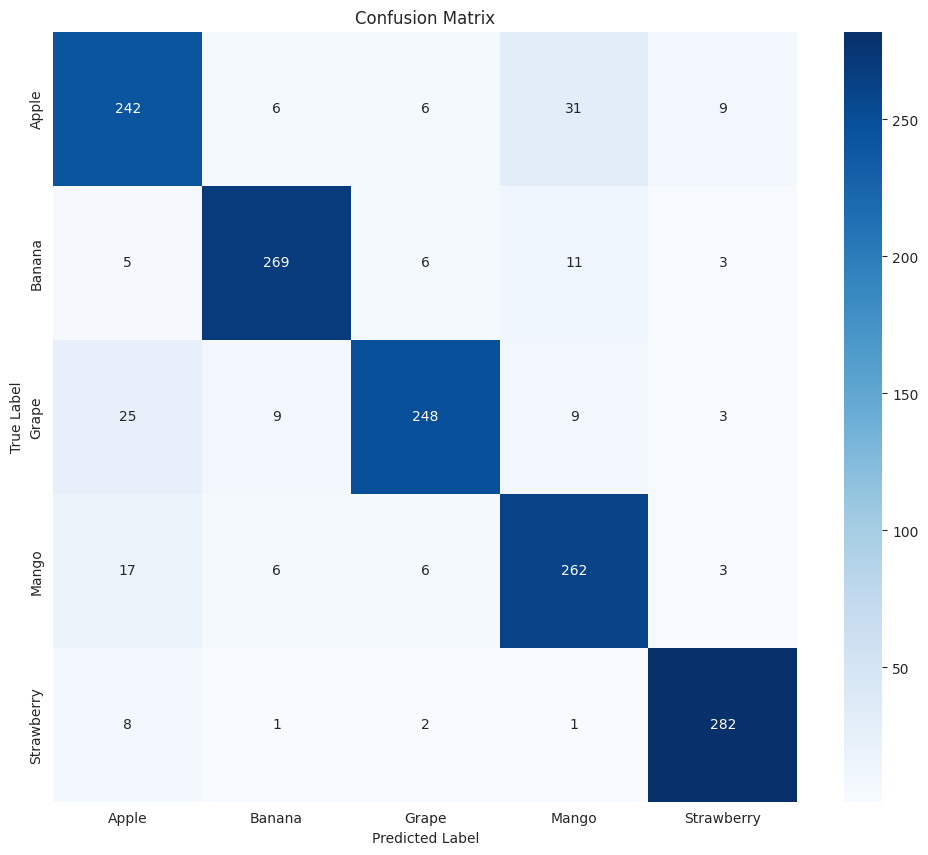

In [21]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Menyimpan model dalam format TensorFlow SavedModel
model.export('/content/submission/saved_model')

Saved artifact at '/content/submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_385')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132586489368976: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  132586489366672: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  132586517588176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517586832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517588368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517586640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517592208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517588560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517587792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517590096: TensorSpec(shape=(), dtype=tf.

## **Konversi Model**

Mengkonversi model Keras ke dalam format TensorFlow Lite (.tflite), kemudian menyimpannya beserta file yang berisi daftar label untuk setiap kelas.

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

os.makedirs("/content/submission/tflite", exist_ok=True)

# Simpan model .tflite
with open("/content/submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan label (jika pakai klasifikasi)
class_names = list(train_generator.class_indices.keys())
with open("/content/submission/tflite/label.txt", "w") as f:
    f.write("\n".join(class_names))

Saved artifact at '/tmp/tmpl6ym35cr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_385')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132586489368976: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  132586489366672: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  132586517588176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517586832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517588368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517586640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517592208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517588560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517587792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586517590096: TensorSpec(shape=(), dtype=tf.resource, name=

In [24]:
# Mengonversi model ke format TensorFlow.js.
!pip install tensorflowjs
!tensorflowjs_converter --input_format=tf_saved_model /content/submission/saved_model /content/submission/tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-04-24 14:32:13.106134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745505133.126066   13847 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:174

In [25]:
# Menyimpan daftar semua library serta versi yang dipakai
!pip freeze > /content/submission/requirements.txt

## **Inference** (Optional)

Melakukan prediksi pada gambar pisang dari folder banana menggunakan model saved_model, dan hasilnya sangat akurat, yang menunjukkan bahwa model telah belajar dengan efektif.

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step


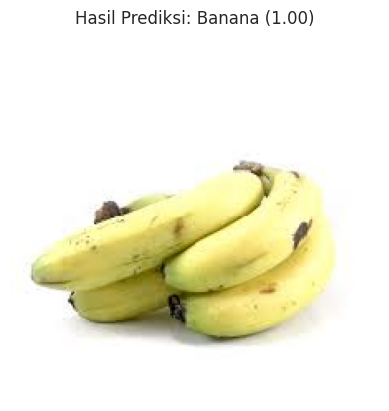

Apple     : 0.00
Banana    : 1.00
Grape     : 0.00
Mango     : 0.00
Strawberry: 0.00


In [26]:
# Impor modul dan muat model dari folder SavedModel
from tensorflow.keras.preprocessing import image  # Tambahkan impor untuk image preprocessing
layer = TFSMLayer("/content/submission/saved_model", call_endpoint="serving_default")
model = Sequential()
model.add(layer)

# Persiapkan dan proses gambar yang akan diprediksi
img_path = "/content/Fruits Classification/submission/test/Banana/Banana (2000).jpeg"
img = image.load_img(img_path, target_size=(224, 224))  # Ubah ukuran gambar agar sesuai dengan input model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi piksel

# Lakukan prediksi menggunakan model
pred_dict = model.predict(img_array)
pred = list(pred_dict.values())[0][0]  # Ambil hasil prediksi dari output model

# Daftar nama kelas
class_names = ["Apple", "Banana", "Grape", "Mango", "Strawberry"]

# Visualisasikan gambar dan hasil klasifikasi
plt.imshow(img)
plt.axis('off')
plt.title(f"Hasil Prediksi: {class_names[np.argmax(pred)]} ({pred[np.argmax(pred)]:.2f})")
plt.show()

# Cetak seluruh probabilitas prediksi untuk masing-masing kelas
for i, prob in enumerate(pred):
    print(f"{class_names[i]:<10}: {prob:.2f}")

Selain menggunakan model saved_model, pengujian juga dilakukan pada model dalam format tflite untuk mengevaluasi tingkat akurasinya.

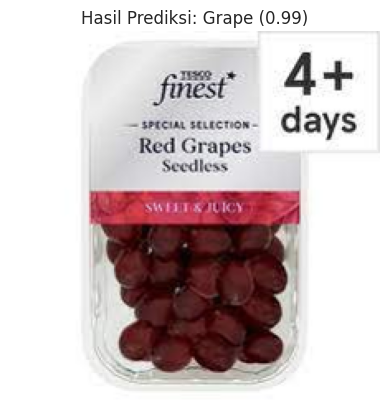

Apple     : 0.00
Banana    : 0.00
Grape     : 0.99
Mango     : 0.00
Strawberry: 0.01


In [27]:
# Inisialisasi interpreter TensorFlow Lite dan alokasikan tensor
interpreter = tf.lite.Interpreter(model_path="/content/submission/tflite/model.tflite")
interpreter.allocate_tensors()

# Mendapatkan informasi input dan output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Path menuju gambar yang akan diprediksi
img_path = "/content/Fruits Classification/submission/test/Grape/Grape (151).jpeg"

# Proses pra-pemrosesan gambar
img = Image.open(img_path).resize((224, 224))  # Ubah ukuran gambar
img_array = np.array(img).astype(np.float32) / 255.0  # Normalisasi nilai piksel
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

# Melakukan inferensi
interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])[0]  # Ambil hasil prediksi

# Daftar nama kelas
class_names = ["Apple", "Banana", "Grape", "Mango", "Strawberry"]

# Visualisasi gambar dan hasil prediksi
plt.imshow(img)
plt.axis('off')
plt.title(f"Hasil Prediksi: {class_names[np.argmax(output_data)]} ({output_data[np.argmax(output_data)]:.2f})")
plt.show()

# Tampilkan semua probabilitas untuk setiap kelas
for i, prob in enumerate(output_data):
    print(f"{class_names[i]:<10}: {prob:.2f}")

In [28]:
# ZIP folder submission
!zip -r /content/submission.zip /content/submission

# Download zip-nya
from google.colab import files
files.download("/content/submission.zip")

  adding: content/submission/ (stored 0%)
  adding: content/submission/saved_model/ (stored 0%)
  adding: content/submission/saved_model/variables/ (stored 0%)
  adding: content/submission/saved_model/variables/variables.index (deflated 76%)
  adding: content/submission/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/submission/saved_model/assets/ (stored 0%)
  adding: content/submission/saved_model/fingerprint.pb (stored 0%)
  adding: content/submission/saved_model/saved_model.pb (deflated 91%)
  adding: content/submission/tflite/ (stored 0%)
  adding: content/submission/tflite/model.tflite (deflated 7%)
  adding: content/submission/tflite/label.txt (stored 0%)
  adding: content/submission/requirements.txt (deflated 57%)
  adding: content/submission/tfjs_model/ (stored 0%)
  adding: content/submission/tfjs_model/group1-shard14of15.bin (deflated 8%)
  adding: content/submission/tfjs_model/group1-shard9of15.bin (deflated 7%)
  adding: content/submissi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>